<a href="https://colab.research.google.com/github/cisco00/hamoye/blob/master/multiple_linear_Regression_Hamoye_Task_2%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> Import Librraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

> Load dataset

In [ ]:
data = pd.read_csv('energydata_complete_quiz.csv')

In [ ]:
data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

> The data is clean

In [ ]:
data.drop(columns=['date', 'lights'], inplace=True)

In [ ]:
data

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,60,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,50,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,50,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,60,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,90,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,270,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,420,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


> Separate predictor and target columns

In [ ]:
predictors = data.drop(columns=['Appliances'])

In [ ]:
target = data[['Appliances']]

> check for colinearity among preditor variables

In [ ]:
predictors.corr()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
T1,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,0.885247,-0.014782,...,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
RH_1,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,0.205797,0.303258,...,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
T2,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,0.720550,0.029595,...,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
RH_2,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,0.110409,0.250271,...,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
T3,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,0.888169,-0.066355,...,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
RH_3,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,-0.050062,0.375422,...,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
T4,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,0.871813,-0.076489,...,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
RH_4,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,0.091812,0.352591,...,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787
T5,0.885247,0.205797,0.720550,0.110409,0.888169,-0.050062,0.871813,0.091812,1.000000,0.032786,...,0.911055,0.072308,0.651321,-0.170999,-0.273953,-0.145011,-0.084164,0.588362,-0.005490,-0.005490
RH_5,-0.014782,0.303258,0.029595,0.250271,-0.066355,0.375422,-0.076489,0.352591,0.032786,1.000000,...,-0.138509,0.272197,-0.053126,-0.119327,0.185941,0.082044,-0.013133,0.078175,-0.011056,-0.011056


> check distribution

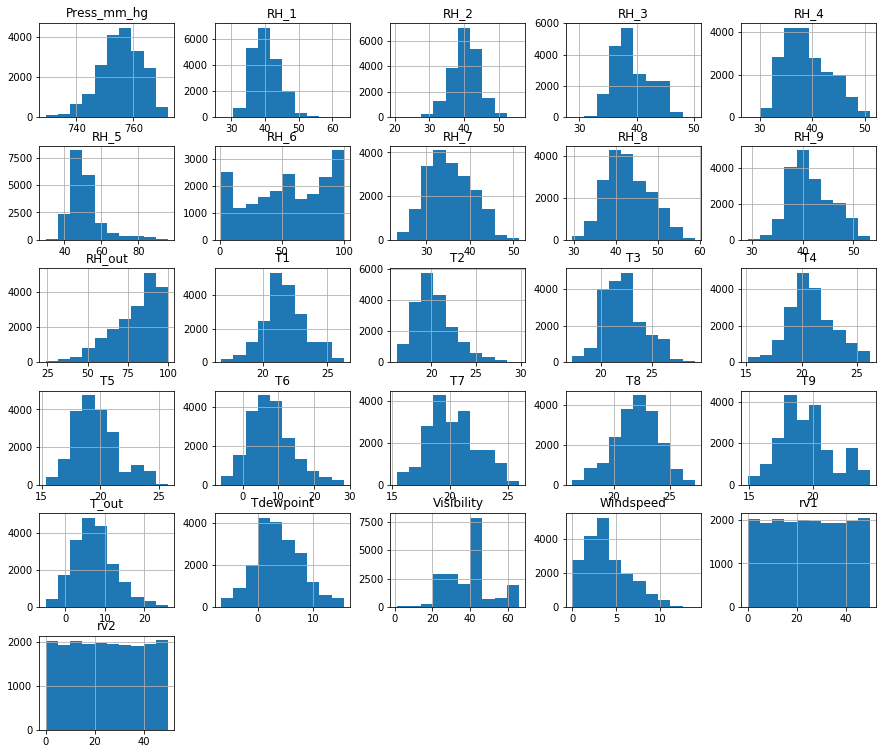

In [ ]:
predictors.hist(figsize=(15,13))
plt.show()

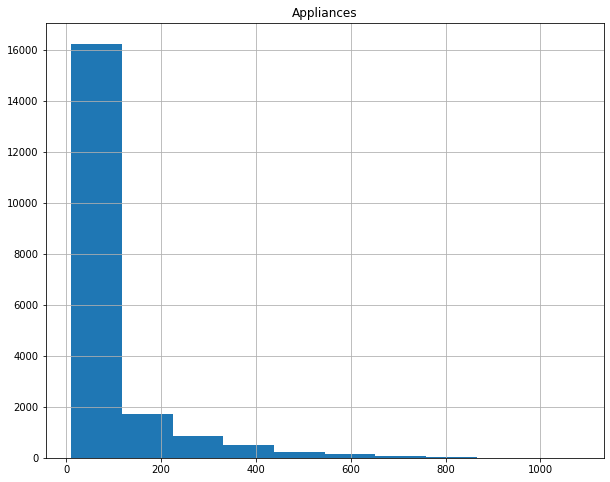

In [ ]:
target.hist(figsize=(10,8));

<!-- > Our predictor variables have high multicolinearity among themselves, hence we have to deal with them doing the following:

1. normalize dataset using MInMaxScaler

2. Apply PCA technique to get the predictors with hiher explanations -->

> normalize predictor & target variables

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaled_predictors = scaler.fit_transform(predictors)
scaled_predictors = pd.DataFrame(scaled_predictors, columns=predictors.columns)

In [ ]:
scaled_target = scaler.fit_transform(target)
scaled_target = pd.DataFrame(scaled_target, columns=target.columns)

In [ ]:
scaled_target

,Appliances
0,0.046729
1,0.046729
2,0.037383
3,0.037383
4,0.046729
...,...
19730,0.084112
19731,0.074766
19732,0.242991
19733,0.383178


In [ ]:
scaled_predictors

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.327350,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.327350,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.327350,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,0.380037,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.327350,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,0.380037,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.327350,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,0.380037,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,0.926786,0.537657,0.711655,0.606309,0.830841,0.579374,0.864865,0.765258,0.752031,0.339590,...,0.864724,0.729443,0.891747,0.602326,0.416667,0.238095,0.348718,0.901961,0.861981,0.861981
19731,0.919747,0.536006,0.701769,0.607836,0.825302,0.582178,0.864865,0.765258,0.754897,0.338487,...,0.864724,0.729443,0.887460,0.602326,0.421053,0.250000,0.361538,0.900452,0.985726,0.985726
19732,0.919747,0.538666,0.692651,0.627198,0.818378,0.603988,0.864865,0.771233,0.754897,0.337585,...,0.864724,0.729443,0.883173,0.602326,0.425439,0.261905,0.374359,0.898944,0.583979,0.583979
19733,0.919747,0.549491,0.677054,0.634717,0.805085,0.585294,0.864865,0.773794,0.752031,0.336583,...,0.864724,0.730581,0.878885,0.602326,0.429825,0.273810,0.387179,0.897436,0.126371,0.126371


check distribution again

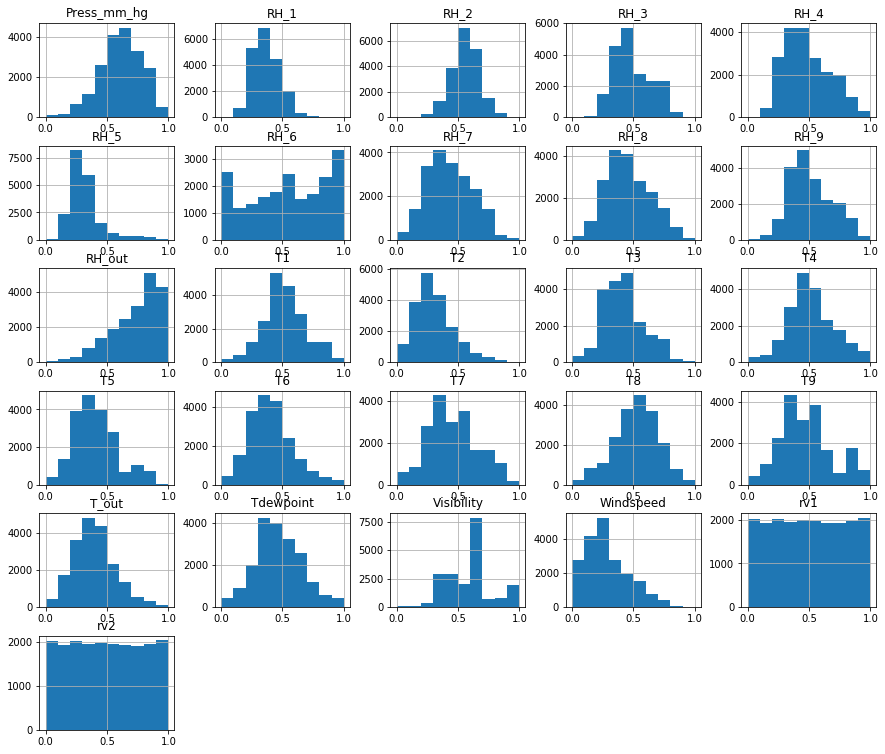

In [ ]:
pd.DataFrame(scaled_predictors).hist(figsize=(15,13))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a1872c780>]],
      dtype=object)

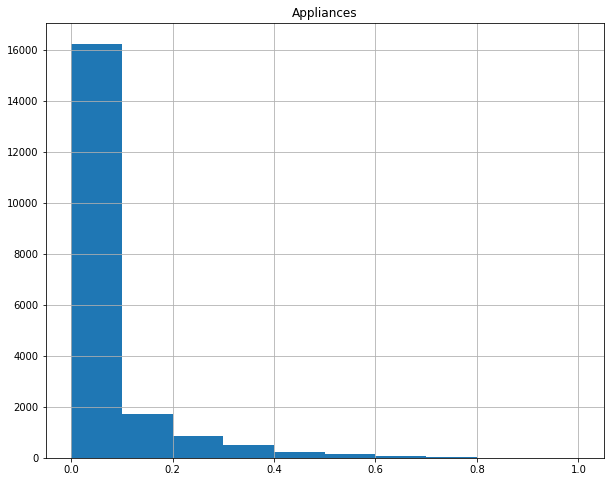

In [ ]:
pd.DataFrame(scaled_target).hist(figsize=(10,8))

In [ ]:
pd.DataFrame(scaled_predictors).corr()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
T1,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,0.885247,-0.014782,...,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
RH_1,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,0.205797,0.303258,...,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
T2,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,0.720550,0.029595,...,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
RH_2,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,0.110409,0.250271,...,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
T3,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,0.888169,-0.066355,...,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
RH_3,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,-0.050062,0.375422,...,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
T4,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,0.871813,-0.076489,...,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
RH_4,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,0.091812,0.352591,...,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787
T5,0.885247,0.205797,0.720550,0.110409,0.888169,-0.050062,0.871813,0.091812,1.000000,0.032786,...,0.911055,0.072308,0.651321,-0.170999,-0.273953,-0.145011,-0.084164,0.588362,-0.005490,-0.005490
RH_5,-0.014782,0.303258,0.029595,0.250271,-0.066355,0.375422,-0.076489,0.352591,0.032786,1.000000,...,-0.138509,0.272197,-0.053126,-0.119327,0.185941,0.082044,-0.013133,0.078175,-0.011056,-0.011056


> Split to test and train data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(scaled_predictors,scaled_target, test_size = 0.3)

In [ ]:
x_train

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
10623,0.452482,0.381066,0.181730,0.683382,0.385510,0.489952,0.414414,0.505335,0.378404,0.270274,...,0.468262,0.493515,0.419614,0.577907,0.934211,0.285714,0.961538,0.631222,0.632702,0.632702
12464,0.422386,0.378864,0.122850,0.681507,0.481888,0.503038,0.492492,0.475032,0.465361,0.299895,...,0.583767,0.617688,0.289389,0.520155,0.877193,0.309524,0.600000,0.417798,0.488966,0.488966
18682,0.644139,0.483442,0.420887,0.681507,0.597375,0.526406,0.788889,0.648883,0.617296,0.277792,...,0.791883,0.606788,0.610932,0.668992,0.802632,0.309524,0.487179,0.819005,0.909061,0.909061
1509,0.246568,0.287634,0.147807,0.475209,0.163399,0.527808,0.135135,0.449851,0.139513,0.248363,...,0.111689,0.551876,0.128617,0.809302,0.828947,0.214286,0.938462,0.167421,0.611533,0.611533
18055,0.655755,0.348867,0.327114,0.588715,0.672150,0.412370,0.746847,0.389671,0.722408,0.195093,...,0.822060,0.494816,0.416935,0.744961,0.986842,0.071429,0.412821,0.650075,0.094538,0.094538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3839,0.472017,0.518393,0.319845,0.657981,0.391949,0.738472,0.338438,0.752454,0.348357,0.432964,...,0.451613,0.883002,0.380493,0.343798,0.802632,0.488095,0.600000,0.501508,0.998883,0.998883
8235,0.444562,0.333089,0.188999,0.590590,0.262269,0.428416,0.524925,0.334614,0.330626,0.288918,...,0.267777,0.255243,0.307074,0.619767,0.664474,0.285714,0.600000,0.314480,0.873362,0.873362
14510,0.538543,0.299330,0.527502,0.386259,0.456962,0.336501,0.684685,0.325651,0.446249,0.225165,...,0.561915,0.382174,0.583065,0.775194,0.438596,0.285714,0.476923,0.514329,0.386537,0.386537
6165,0.444562,0.452527,0.268234,0.610085,0.326797,0.561926,0.591291,0.548015,0.315200,0.302816,...,0.375650,0.506347,0.377814,0.630233,0.743421,0.357143,0.392308,0.463801,0.448489,0.448489


In [ ]:
x_test

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19272,0.771911,0.390148,0.527502,0.563408,0.664673,0.487615,0.774775,0.566510,0.760631,0.338628,...,0.812695,0.423565,0.572347,0.695349,0.592105,0.285714,0.600000,0.619910,0.620769,0.620769
13085,0.602957,0.340611,0.529925,0.438560,0.492966,0.435738,0.647748,0.448286,0.533397,0.216294,...,0.635796,0.427704,0.710611,0.484109,0.333333,0.428571,0.600000,0.579940,0.880731,0.880731
11978,0.571278,0.494725,0.392537,0.681507,0.456962,0.618476,0.549550,0.743918,0.426183,0.300346,...,0.561915,0.671909,0.694534,0.468992,0.622807,0.238095,0.600000,0.811463,0.403066,0.403066
12285,0.613516,0.384644,0.247153,0.709626,0.581589,0.468453,0.540541,0.574762,0.531295,0.354626,...,0.613944,0.608306,0.390675,0.580233,0.868421,0.214286,0.492308,0.549774,0.438259,0.438259
6181,0.485744,0.422163,0.261691,0.626957,0.324028,0.585294,0.611712,0.509176,0.309740,0.308336,...,0.375650,0.489790,0.391211,0.637597,0.721491,0.250000,0.600000,0.467572,0.676429,0.676429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8486,0.440690,0.258967,0.290768,0.422814,0.274177,0.369061,0.594595,0.264760,0.226469,0.235340,...,0.327090,0.481098,0.478028,0.696899,0.403509,0.095238,0.323077,0.349925,0.488590,0.488590
6232,0.507920,0.383726,0.261691,0.579998,0.315720,0.548372,0.501502,0.458387,0.387960,0.783498,...,0.344433,0.477255,0.166131,0.725581,0.960526,0.142857,0.307692,0.288084,0.090275,0.090275
10851,0.644139,0.374369,0.338745,0.624238,0.490196,0.501636,0.447447,0.584863,0.494028,0.326509,...,0.520291,0.548979,0.413183,0.452326,0.894737,0.357143,0.961538,0.597285,0.619212,0.619212
11594,0.497360,0.321347,0.174461,0.608117,0.445885,0.473594,0.441441,0.482572,0.417582,0.286964,...,0.552549,0.580850,0.256163,0.688372,0.934211,0.142857,0.887179,0.398190,0.502400,0.502400


In [ ]:
y_train

,Appliances
10623,0.401869
12464,0.037383
18682,0.056075
1509,0.037383
18055,0.056075
...,...
3839,0.028037
8235,0.084112
14510,0.046729
6165,0.037383


In [ ]:
y_test

,Appliances
19272,0.093458
13085,0.074766
11978,0.084112
12285,0.037383
6181,0.046729
...,...
8486,0.046729
6232,0.028037
10851,0.046729
11594,0.018692


> Modelling

In [ ]:
reg1 = LinearRegression()
reg2 = LinearRegression()

> fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6). What is the R^2 value in two D.P?

In [ ]:
norm_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [ ]:
norm_data

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,0.327350,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.327350,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.327350,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.327350,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.327350,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,0.084112,0.926786,0.537657,0.711655,0.606309,0.830841,0.579374,0.864865,0.765258,0.752031,...,0.864724,0.729443,0.891747,0.602326,0.416667,0.238095,0.348718,0.901961,0.861981,0.861981
19731,0.074766,0.919747,0.536006,0.701769,0.607836,0.825302,0.582178,0.864865,0.765258,0.754897,...,0.864724,0.729443,0.887460,0.602326,0.421053,0.250000,0.361538,0.900452,0.985726,0.985726
19732,0.242991,0.919747,0.538666,0.692651,0.627198,0.818378,0.603988,0.864865,0.771233,0.754897,...,0.864724,0.729443,0.883173,0.602326,0.425439,0.261905,0.374359,0.898944,0.583979,0.583979
19733,0.383178,0.919747,0.549491,0.677054,0.634717,0.805085,0.585294,0.864865,0.773794,0.752031,...,0.864724,0.730581,0.878885,0.602326,0.429825,0.273810,0.387179,0.897436,0.126371,0.126371


In [ ]:
x= data[['T2']].values.tolist()
y = data[['T6']].values.tolist()

In [ ]:
x1, x2, y1, y2 = train_test_split(x, y, train_size=0.7)

In [ ]:
model1 = reg1.fit(x1, y1) 

In [ ]:
model1

LinearRegression()

In [ ]:
pred1 = model1.predict(x2)

r2_score

In [ ]:
r2_score(y2, pred1)

0.6434002138024824

model2 

In [ ]:
model2 = reg2.fit(x_train, y_train)

In [ ]:
model2

LinearRegression()

In [ ]:
pred2 = model2.predict(x_test)

In [ ]:
pred2

array([[0.10717255],
       [0.09466508],
       [0.0719476 ],
       ...,
       [0.06802776],
       [0.05351665],
       [0.06996222]])

mean_absolute_error

In [ ]:
mean_absolute_error(pred2,y_test)

0.04993092913682454

rss

In [ ]:
rss = np.sum(np.square(y_test - pred2)).round(3)

In [ ]:
rss

Appliances    46.497
dtype: float64

rmse

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, pred2))

In [ ]:
rmse

0.08861635427027195

In [ ]:
r2_score(y_test, pred2)

0.15350719689876025

Obtain the feature weights from your linear model above. Which features have the lowest and highest weights respectively?

Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha= 0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5)

● Feature Selection and Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha= 0.001 )
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [ ]:
pd.DataFrame(reg2.coef_)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.017745,0.552827,-0.290076,-0.502378,0.284746,0.09989,0.024634,0.042608,0.004514,0.010881,...,-0.184409,-0.037816,-0.251932,0.004802,-0.043029,0.020683,0.013679,0.069259,-0.000445,-0.000445


In [ ]:
y_train

,Appliances
10623,0.401869
12464,0.037383
18682,0.056075
1509,0.037383
18055,0.056075
...,...
3839,0.028037
8235,0.084112
14510,0.046729
6165,0.037383


In [ ]:
def get_weights_df(model, feat, col_name) :
#this function returns the weight of every feature
    weights = pd.DataFrame(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame([weights]).reset_index()
    weights_df.columns = [ 'Features' , col_name]
    weights_df[col_name].round( 3 )
    return weights_df

linear_model_weights = get_weights_df(reg2, x_train, 'Linear_Model_Weight' )
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight' )
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight' )
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on= 'Features' )
final_weights = pd.merge(final_weights, lasso_weights_df, on= 'Features' )

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha= 0.4)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.4)

In [ ]:
ridge_pred = ridge_reg.predict(x_test)

In [ ]:
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))

In [ ]:
ridge_rmse == rmse

False

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha= 0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [ ]:
lasso_pred = lasso_reg.predict(x_test)

In [ ]:
lasso_pred

array([0.08932701, 0.10204447, 0.0887387 , ..., 0.07376657, 0.07126162,
       0.08049164])

In [ ]:
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))

In [ ]:
lasso_rmse

0.09522964527132873